##### <h2 align="center">Machine Learning</h2> 
<h3 align="center">Travis Millburn<br>Fall 2020</h3> 

<center>
<img src="../images/logo.png" alt="drawing" style="width: 300px;"/>
</center>

<h3 align="center">Week 11: Deep Learning</h3> 

### Outline
1. Semester Projects
2. Terms
3. Deep Learning Introduction
4. Lab

### Projects

Requirements: 
1. Must be python, delivered in Jupyter notebook.
2. Must be supervised learning problem.

Rubric:
1. Data selection interesting/challenging?
2. Method interesting/challenging/thorough?
3. Validation thorough, done properly?
4. Report - well-written/understandable, explains pros/cons of method, what happened & why (can use jupyter completely if use markdown & latex).

Note: some related tasks will go into participation or homework grade.

Project Proposal due 11/16.  Two weeks.

## Method to the Madness:  AI vs ML vs DL
* AI:  
    - Born in the 50s  
    - AI, as most-often used, includes the fields of Machine Learning and Deep Learning
    - Expert Systems, explicit rules (think back to week 1)
    
* ML:  
    - As opposed to explicit rules pre-programmed, ML attempts to allow computers to unlock relationships by looking at the data
    - We train ML models, but we program AI rules

* Deep Learning
    - DL is a subset of ML  
    - Part of ML that is not DL sometimes referred to as shallow learning
    - Not better understanding, but successive layers of representations
    - Usually hundreds of layers  
    - Usually implemented via Neural Network Models  
    - 
    
    
    

## What is Deep Learning ?
* 

<center>
<img src="../images/deep_learning_what_is.png" alt="drawing" style="width: 600px;"/>
</center>

Source: Deep Learning with Python by Francois Chollet

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# TensorFlow
import tensorflow as tf

print(tf.__version__)

2.3.1


In [3]:
import keras
keras.__version__

'2.4.3'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(test_images.shape)
print(train_labels)

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]


### "Preprocessing"

Note values range from 0 to 255 (8 bit integers)

We want to _normalize_ to between 0 and 1

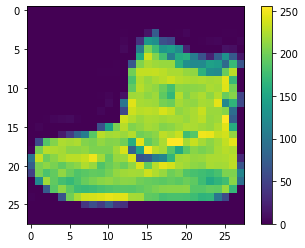

In [6]:
plt.imshow(train_images[0])
plt.colorbar();

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

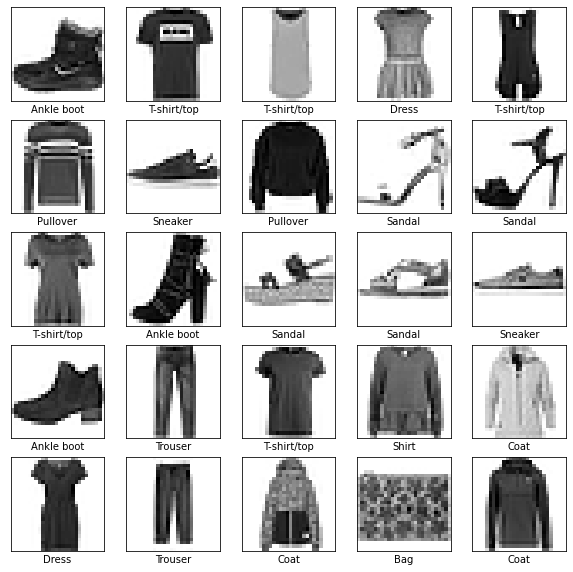

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Define the network model

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### "Compile" the network

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

1. Sparse - recall what this means?
2. Cross-entropy
3. Categorical Cross-entropy

### Optimize the network

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8210
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3463 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3311 - accuracy: 0.8823
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8877


### Compute accuracy on test set

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8581
Test accuracy: 0.8580999970436096


### Use network to classify samples

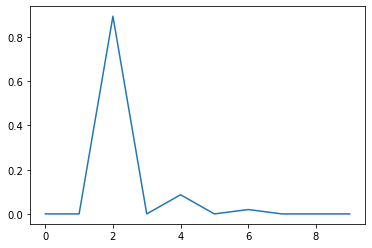

In [14]:
predictions = model.predict(test_images)
plt.plot(predictions[1]);

In [15]:
print(np.argmax(predictions[0]), test_labels[0])

9 9


In [16]:
print(class_names[np.argmax(predictions[0])], class_names[test_labels[0]])

Ankle boot Ankle boot


### .predict() expects an array of samples (as a tensor)

In [17]:
img = test_images[0]

print(img.shape)

(28, 28)


In [18]:
img_tensor = (np.expand_dims(img,0))

print(img_tensor.shape)

(1, 28, 28)


In [19]:
predictions_single = model.predict(img_tensor)

print(predictions_single)

[[3.57711721e-10 1.01430364e-10 1.58373134e-10 9.07572073e-10
  8.60207478e-12 3.71246808e-03 1.99824338e-10 3.84299993e-03
  5.58715962e-09 9.92444575e-01]]


In [20]:
predictions_single = model.predict(np.array([img]))

print(predictions_single)

[[3.57711721e-10 1.01430364e-10 1.58373134e-10 9.07572073e-10
  8.60207478e-12 3.71246808e-03 1.99824338e-10 3.84299993e-03
  5.58715962e-09 9.92444575e-01]]


### Adding Validation data

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(test_images, test_labels, test_size=0.33)

In [22]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history =  model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=20)

Epoch 1/20
210/210 [==============================] - 1s 4ms/step - loss: 0.8133 - accuracy: 0.7157 - val_loss: 0.6914 - val_accuracy: 0.7400
Epoch 2/20
210/210 [==============================] - 1s 3ms/step - loss: 0.5706 - accuracy: 0.7969 - val_loss: 0.6373 - val_accuracy: 0.7676
Epoch 3/20
210/210 [==============================] - 1s 3ms/step - loss: 0.5007 - accuracy: 0.8181 - val_loss: 0.5092 - val_accuracy: 0.8209
Epoch 4/20
210/210 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.8334 - val_loss: 0.5886 - val_accuracy: 0.7924
Epoch 5/20
210/210 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.8458 - val_loss: 0.5647 - val_accuracy: 0.8097
Epoch 6/20
210/210 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8554 - val_loss: 0.4841 - val_accuracy: 0.8379
Epoch 7/20
210/210 [==============================] - 1s 4ms/step - loss: 0.3756 - accuracy: 0.8654 - val_loss: 0.5285 - val_accuracy: 0.8139
Epoch 

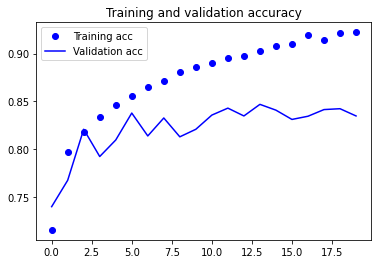

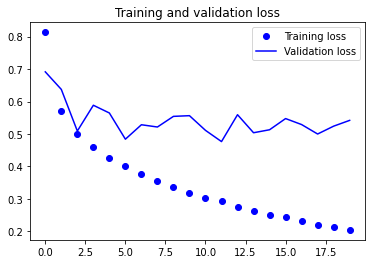

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

### Convolutional Network

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 65,994
Trainable params: 65,994
Non-trainable params: 0
__________________________________________________

In [27]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 131s 140ms/step - loss: 0.1514 - accuracy: 0.9521
Epoch 2/5
938/938 [==============================] - 153s 163ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 3/5
938/938 [==============================] - 160s 171ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 4/5
938/938 [==============================] - 166s 177ms/step - loss: 0.0226 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 167s 178ms/step - loss: 0.0191 - accuracy: 0.9943


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 19ms/step - loss: 0.0260 - accuracy: 0.9915


In [30]:
test_acc

0.9915000200271606

### Week 11 Lab.
Install Tensorflow and Keras.
Print Version Numbers.
We will build models next week.

### Week 11 HW
Begin Project Research.
Read last two chapters of book:  Ch. 7 working with text data   Ch. 8 Wrapping Up